In [17]:
%matplotlib widget

In [1]:

from BIOViewer import EventViewer, EventConfig
import sys 
sys.path.append('../')
from utils import build_montage, all_referential,all_bipolar, cut_and_jitter

In [2]:
dataset = 'Rep'
if dataset == 'Clemson':
    df = pd.read_csv('../Models/specialized_all_bipolar_aug/pred_Clemson.csv')
    path_folder = '/media/moritz/Expansion/Data/Spikes_clemson_10s/preprocessed_npy'

elif dataset =='Rep':
    df = pd.read_csv('../Models/specialized_all_bipolar_aug/pred_Rep.csv')
    path_folder = '/media/moritz/internal_expansion/Data/Bonobo/cluster_center/' 

In [3]:
filepaths = [os.path.join(path_folder,f+'.npy') for f in df.event_file]
titles = 'file: '+df.event_file+'\npred: '+df.preds.round(2).astype(str)+'\nlabel: '+df.fraction_of_yes.astype(str)
titles = list(titles)

In [4]:
loader = np.load
Fs = 128
all_referential = ['Fp1','F3','C3','P3','F7','T3','T5','O1', 'Fz','Cz','Pz', 'Fp2','F4','C4','P4','F8','T4','T6','O2']

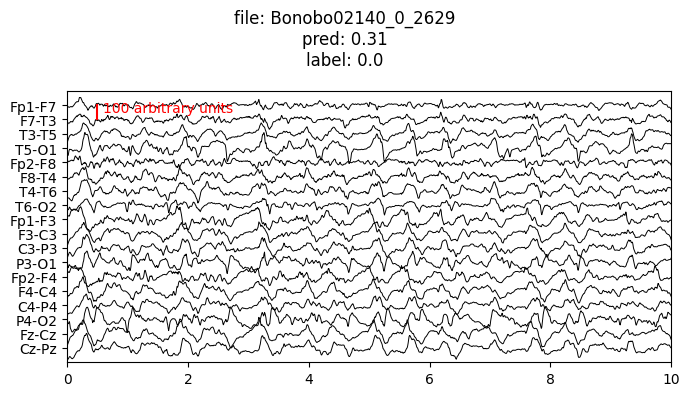

In [5]:
montage = build_montage(storage_channels=all_referential,montage_channels=all_bipolar)
cutter = cut_and_jitter(10,0,Fs)
signalconfig = EventConfig(filepaths,loader,Fs,all_bipolar,scale= 100,transforms=[montage,cutter])
viewer = EventViewer(signal_configs=[signalconfig],windowsize=10,title=titles)

<Axes: >

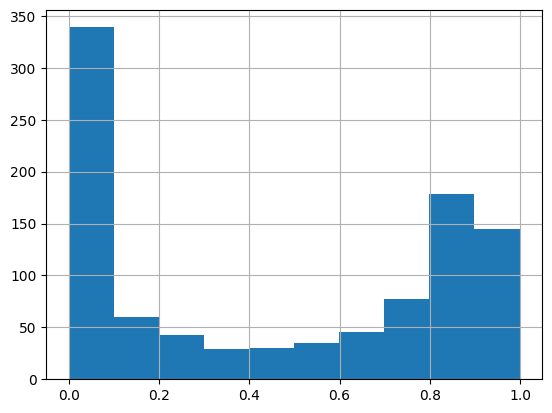

In [6]:
df.preds.hist()